
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
    <meta http-equiv="Content-Style-Type" content="text/css" />
    <meta name="generator" content="pandoc" />
    <title></title>
    <style type="text/css">code{white-space: pre;}</style>
  </head>
  



<h1> AMI </h1> 
<h1> Aprendizaje Supervisado: Clasificadores </h1>

<br>
    
Un clasificador trata de predecir una salida de tipo discreto, o para ser más precisos donde los posibles valores de salida foman un conjunto finito. Por ejemplo, un clasificador en un entorno médico puede tener como fin indicar si un paciente sufre o no una patología en función de diversas variables conocidas (<em>features</em>. La salida (<em>target</em>) en este ejemplo es binaria (SÍ/NO). Otro ejemplo sería por ejemplo predecir la cifra que aparece en una imagen (0/.../9), el género musical al que pertenece una canción (ROCK/POP/CLASICA/...), si una frase es correcta (SÍ/NO), si un correo es SPAM/NO SPAM, etc. 

Como en el caso de los regresores es un tipo de aprendizaje supervisado ya que partimos de un dataset donde se conoce el valor de salida asociado a cada ejemplo de entrada. Nuestro objetivo es ver como extender el esquema general presentado para sistemas regresores al caso de los clasificadores, incidiendo en las diferencias y en las sorprendentes similitudes que encontraremos. En general un problema de clasificación se estructura del siguiente modo:  

<ol>
    <li> Partiremos de una dataset dado por una matriz <font size="+1"><span class="math inline">$X_{m\times n}$</span></font> (siendo m el número de registros y n el numero de variables de entrada) y por un vector columna <font size="+1"><span class="math inline">$y_{m\times 1}$</span></font> que contendrá el valor observado de salida para el registro m.
    <li> Plantearemos una función de hipótesis <font size="+1"><span class="math inline">$h_{\theta}(x)$</span></font> que prediga el valor de salida para un vector fila de entradas <font size="+1"><span class="math inline">$x_{1\times n}$</span></font>
    <li> Crearemos una función de coste que dependerá del vector de parámetros del modelo, <font size="+1"><span class="math inline">$\theta$</span></font>
    <li> Mediante un mecanismo de optimización como el descenso del gradiente, buscaremos la parametrización óptima
</ol>

Como puede observar el modelo es idéntico al caso de los regresores. El mayor cambio estará en la búsqueda de una función de hipótesis adecuada. Existen decenas de arquitecturas propuestas para esa tarea (árboles de decición, máquinas de vector soporte, redes neuronales artificiales, k vecinos más cercanos, etc.). Nosotros estudiaremos una de las más sencillas: los <b>regresores lógisticos</b>. Veremos que a pesar de su sencillez pueden ser adecuados en muchos casos. En general, más que el algoritmo específico, la clave está en disponer de un dataset de calidad. Esto requiere que el etiquetado (<em>labeling</em> haya sido bien realizado y que las features seleccionadas sean representativas, lo cual suele requerir de muchos años de experiencia y expertos muy cualificados en un área. 

Estos últimos aspectos no son siempre posibles, y es el mótivo por el cual se han buscado alternativas en los últimos años. En realidad los nuevos sistemas de aprendizaje profundo han sido cruciales porque automatizan la búsqueda de features representativas a partir de cantidades masivas de datos, y eliminan -hasta cierto punto- por tanto la necesidad de años de investigación para caracterizar bien un problema.

Pasaremos ahora a exponer las bases de los regresores logísticos. 

<h2> Regresores logísticos </h2>

Empezaremos con el caso más sencillo, con un problema de clasificación binario. Usaremos un dataset de ejemplo en el que se pretenden clasificar flores según características de sus pétalos. En concreto se busca distinguir ejemplares de la especie <a href=https://www.wikiwand.com/en/Iris_virginica>Iris de Virginia</a>, frente a otras dos especies del tipo <a href=https://www.wikiwand.com/es/Iris_(planta)>Iris</a>

In [82]:
# Librerias
import numpy as np
import os
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys()) # Mostramos los componentes del dataset

['data', 'feature_names', 'target_names', 'target', 'DESCR', 'filename']

In [85]:
# Podemos obtener una descricpción del mismo imprimiendo el campo 'DESCR'
# Como se puede ver es un dataset que contiene información relativa a tres especies de 
# flores indicando longitud y anchos característicos 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [211]:
# Crearemos ahora el conjunto de features X y el de targets y
X = iris["data"][:, (2, 3)]  # longitud pétalo, ancho pétalo
print(X.shape)
y = (iris["target"] == 2).astype(np.int)
y = y.reshape([X.shape[0],1])
print(y.shape)

(150, 2)
(150, 1)


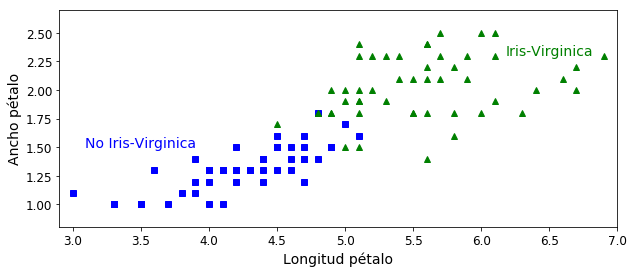

In [212]:
# Ya que son dos features unicamente, podemos realizar una representación gráfica
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(10, 4))
plt.plot(X[y.reshape(X.shape[0],)==0, 0], X[y.reshape(X.shape[0],)==0, 1], "bs")
plt.plot(X[y.reshape(X.shape[0],)==1, 0], X[y.reshape(X.shape[0],)==1, 1], "g^")

plt.text(3.5, 1.5, "No Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Longitud pétalo", fontsize=14)
plt.ylabel("Ancho pétalo", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

<h3> Función de hipótesis </h3>

Un regresor logístico es apto para problemas binarios, y su función de hipótesis se interpreta como la probabilidad de que bajo los datos x se obtenga una clasificación y=1. Es decir:

<p><font size="+1">$h_{\theta} (x) = prob(y=1|x)$</font></p>

En concreto para el regresor lógistico la hipótesis se forma a partir de la función sigmoide (también llamada función logística de la cual toma el nombre el método). Siento esta: 

<p><font size="+1">$\sigma(z) = \frac{1}{1 + e^{-z}}$</font></p>

con 

<p><font size="+1">$z = \theta'x$</font></p>

Es decir: 

<p><font size="+1">$h_{\theta} (x) = prob(y=1|x)=\sigma(\theta' x) = \frac{1}{1 + e^{-\theta'x}}$</font></p>

Nota: al igual que los regresores afines añadimos a cada fila de la matrix $X$ un término independiente 1, por tanto:

<p><font size="+1">$z = \theta'x = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n$</font></p>

siendo $x_0$ = 1.


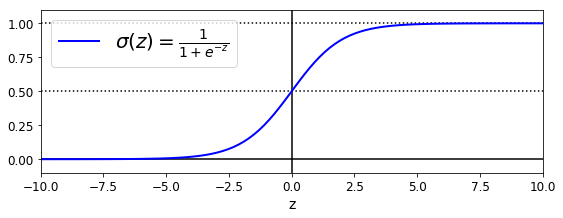

In [191]:
# Vamos a comprobar que "esctructuralmente" cumple ser una función entre 0 y 1
# asimismo nos interesa que tenga buenas características en cuanto a derivabilidad

z = np.linspace(-10, 10, 100)
sig = # FALTA: Debe calcular la funcion sigmoide para los z's dados
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(z) = \frac{1}{1 + e^{-z}}$")
plt.xlabel("z")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

<h3> Función de coste </h3>

La función de coste $J(\theta)$ debe penalizar aquellos datos en el dataset mal clasificados por la función de hipótesis, es decir, aquellos donde $y$ $\ne$ $h_\theta(x)$, y recompensar aquellos casos donde la clasificación sea correcta. Asismismo, queremos que sea una función Clase 1 (es decir, que exista el gradiente), para poder encontrar los parámetros $\theta$ adecuados para el clasificador.

A este fin, la función de coste que se emplea en el regresor lógistico es:

<p><font size="+1">
$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \begin{cases} -log(h_\theta(x^{(i)})\text{, si $y^{(i)}$=$1$}
\\-log(1-h_\theta(x^{(i)})\text{, si $y^{(i)}$=$0$}\end{cases}$
</font></p>

Esta función puede "compactarse" en una sóla línea:

<p><font size="+1">
$ J(\theta) = -\frac{1}{m} [\sum_{i=1}^m y^{(i)} log(h_\theta(x^{(i)}) + (1-y^{(i)}) log(1-h_\theta(x^{(m)})]$
</font></p>

<h3> Cálculo de $\nabla \theta$ </h3>

Se le propone ahora como ejercicio puntuable adicional (+1 pto nota final asignatura) que obtenga la derviada de $J(\theta)$ respecto a cada $\theta_j$, con $j$=1$, \ldots,$ n y la exprese en forma matricial.

Solución: sorprendentemente coincide con la expresión que teniamos para los problemas de regresión: $\nabla \theta = \frac{2}{m}X'(h_\theta(X)-Y)$, por lo cual podemos usar todo el aparato matemático desarrollado previamente!

# FALTA: Demuestre el resultado anterior

<h4>Cuestión: cálcule el regresor logístico óptimo para el problema de clasificación bajo estudio</h4>

0.96


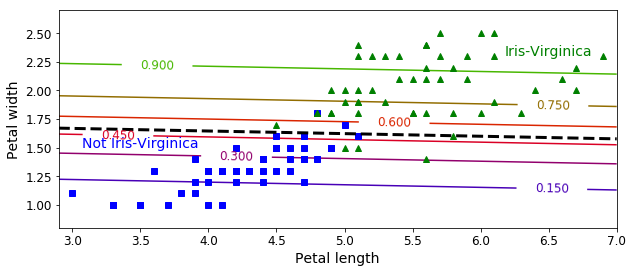

In [251]:
def gradient(X,y,theta):
    m = X.shape[0]
    gradients = # FALTA
    return gradients

def gradientdescend(X,y): 
    alpha = 0.01
    n_iterations = 10000
    theta = np.random.randn(X.shape[1],1) # Punto inicial se escoge al azar
    
    # Iteramos minimizando la funcion    
    for iteration in range(n_iterations):
        gradients = gradient(X,y,theta)
        theta = theta - alpha * gradients
    return theta
        
def sigmoid(z):
    # FALTA
    
def predict(X, theta):
    # FALTA
    
# Calculamos el ajuste  
X_b = np.c_[np.ones([X.shape[0],1]), X]  # Añadimos bias (x0 = 1) a cada instancia
theta_best = gradientdescend(X_b, y.T)
y_predict = predict(X_b, theta_best) # Prediccion para los puntos del dataset

# Calculamos el porcentaje de clasificaciones correctas
y_predict = predict(X_b,theta_best)
precision = # FALTA, calcule el porcentaje de clasificaciones correctas
print(precision) 

# Dibujamos la frontera de decisión
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_b = np.c_[np.ones([X_new.shape[0],1]), X_new] 

y_proba = sigmoid(X_new_b.dot(theta_best))

plt.figure(figsize=(10, 4))
y = y.reshape(150,)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba.reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(theta_best[1] * left_right + theta_best[0]) / theta_best[2]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

<h3> Regresión logística usando la librería scikit-learn </h3>

A continuación mostraremos el uso de las librerías scikit-learn de Python para poder abordar directamente la regresión logística. Como puede comprobar todo el proceso anterior se simplifica enormemente. Asimismo, puede alterar fácilmente la configuración del clasificador (puede consultar <a href=https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>la ayuda online</a> para ver las distintas opciones). 

0.96


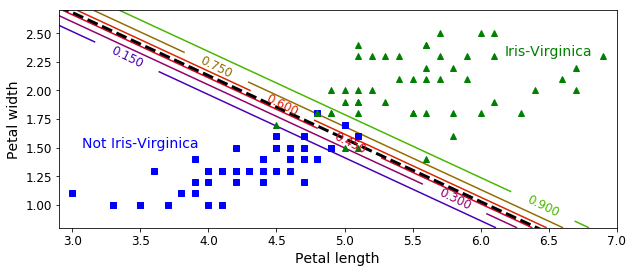

In [219]:
from sklearn.linear_model import LogisticRegression

y = y.reshape(150,)
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

# Calculo de la precisión
y_predict = log_reg.predict(X)
precision = # FALTA, calcule el porcentaje de clasificaciones correctas
print(precision) 

# Representamos el resultado
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
#save_fig("logistic_regression_contour_plot")
plt.show()

<h3>Ejercicio</h3>

Proponga una modificación del método anterior para poder abordar la clasificación del siguiente problema. Calcule el regresor óptimo y de una medida de la precisión de la clasificación. Se aconseja emplear directamente la librería scikit-learn tras transformar adecuadamente los datos.

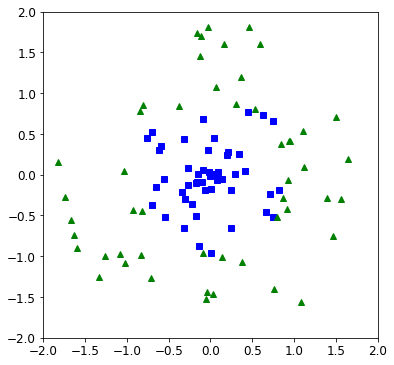

In [291]:
np.random.seed(1)
radio = np.random.rand(50, 1) #0...1
angulo = 2*np.pi*np.random.rand(50,1) #0..2pi
X_clase0 = np.c_[radio*np.cos(angulo), radio*np.sin(angulo)]

radio = 0.9 + np.random.rand(50, 1) #0.9...1.9
angulo = 2*np.pi*np.random.rand(50,1) #0..2pi
X_clase1 = np.c_[radio*np.cos(angulo), radio*np.sin(angulo)]

X = np.r_[X_clase0, X_clase1]
y = np.r_[np.zeros([50,1]),np.ones([50,1])]
#print(X.shape,y.shape)
#print(X,y)

# Ya que son dos features unicamente, podemos realizar una representación gráfica
plt.figure(figsize=(6, 6))
plt.plot(X[y.reshape(X.shape[0],)==0, 0], X[y.reshape(X.shape[0],)==0, 1], "bs")
plt.plot(X[y.reshape(X.shape[0],)==1, 0], X[y.reshape(X.shape[0],)==1, 1], "g^")

plt.axis([-2, 2, -2, 2])
plt.show()

# FALTA, resuelva el problema planteado

<hr>
<h1> Funciones útiles de Python para el desarrollo de la práctica </h1>

<ul>
<li> Establecimiento de la semilla del generador aleatorio: np.random.seed(1)
<hr>
<li> Multiplicacion matrices A y B con numpy: A.dot(B)
<li> Traspuesta de matriz A con numpy: A.T
<li> Inversión de matriz A con numpy: np.linalg.inv(A)
<li> Matriz A por vector 𝜃 con numpy: A.dot(theta)
<li> Medida de tiempo de una orden con ipython: %timeit ...
<li> Medida de tiempo de un bloque con python: <br>
    start_time = timeit.default_timer()<br>
    ...<br>
    elapsed = timeit.default_timer() - start_time
<hr>
<li> Concatenación de vector columna: np.c_[a,b]
<li> Concatenación de vector fila: np.r_[a,b]
<li> Asignación condicional: x = 5 if a==0 else 3
<hr>
<li> Cambio de forma de un vector: y.reshape(150,1)
<li> Cambio de forma de un vector: y.reshape(150,)
<li> Cambio de forma de un vector: y.reshape(1,150)  
<li> Transformar un vector de Booleanos a un vector de 0s y 1s: vector.astype(int)
<li> Media de un vector: vector.mean() o np.mean(vector)
</ul>